# Forward Regression Model

In [43]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [44]:
claremont = pd.read_csv('claremont.csv')
claremont_test = pd.read_csv('claremont_test.csv')

claremont["price"] = claremont["price"]
claremont_test["price"] = claremont_test["price"]

In [45]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year']

X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
forward_linear_reg = LinearRegression()
forward_linear_reg.fit(X_train, y_train)

y_pred = forward_linear_reg.predict(X_test)

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared=False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 110137.77
R^2: 0.8746


# OLS Model

In [48]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 
            'build_year', 'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']

In [87]:
X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

forward_linear_reg = LinearRegression()
forward_linear_reg.fit(X_train, y_train)

y_pred = forward_linear_reg.predict(X_test)

print('RMSE: {:,.2f}'.format(mse(y_test, y_pred, squared=False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 138,945.54
R^2: 0.8005


# Lasso

In [52]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [53]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year', 
            'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']
X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
alphas = np.linspace(0, 50000, 100)[1:]

In [82]:
scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    
    scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores.append(-np.mean(scores_mse))

/Users/jameschok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.918e+10, tolerance: 6.960e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


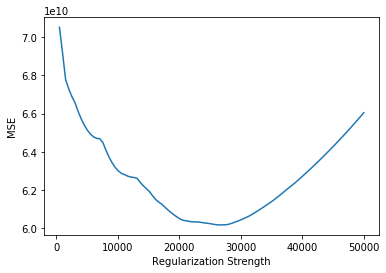

In [83]:
plt.plot(alphas, np.array(scores))
plt.ylabel("MSE")
plt.xlabel("Regularization Strength");

In [74]:
arg_with_min_score = np.argmin(scores)
best_alpha = alphas[arg_with_min_score]

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)
print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 127652.40
R^2: 0.8316


In [76]:
best_alpha

26767.676767676767

In [93]:
ols_model = LinearRegression()
scores_mse = cross_val_score(ols_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(format(np.mean(np.sqrt(-scores_mse)), ",.2f"))

270,670.79


In [101]:
alpha = 5000

lasso_model = Lasso(alpha=alpha)
scores_mse = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores_mse))
print(format(np.mean(np.sqrt(-scores_mse)), ",.2f"))

249,033.51


In [102]:
alpha = 50_000

lasso_model = Lasso(alpha=alpha)
scores_mse = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores_mse))
print(format(np.mean(np.sqrt(-scores_mse)), ",.2f"))

251,426.08


# Ridge

In [104]:
from sklearn.linear_model import Ridge

In [103]:
ols_model = LinearRegression()
scores_mse = cross_val_score(ols_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(format(np.mean(np.sqrt(-scores_mse)), ",.2f"))

270,670.79


In [123]:
alpha = 1

ridge_model = Ridge(alpha=alpha)
scores_mse = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores_mse))
print(format(np.mean(np.sqrt(-scores_mse)), ",.2f"))

246,241.36


In [110]:
alpha = 4

ridge_model = Ridge(alpha=alpha)
scores_mse = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores_mse))
print(format(np.mean(np.sqrt(-scores_mse)), ",.2f"))

239,271.57


In [111]:
alpha = 10

ridge_model = Ridge(alpha=alpha)
scores_mse = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores_mse))
print(format(np.mean(np.sqrt(-scores_mse)), ",.2f"))

248,373.03


In [135]:
alphas = np.linspace(0, 10, 100)[1:]

In [136]:
scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    
    scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores.append(-np.mean(scores_mse))

In [137]:
arg_with_min_score = np.argmin(scores)
best_alpha = alphas[arg_with_min_score]

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE: 116353.15
R^2: 0.8601


In [138]:
best_alpha

2.8282828282828283

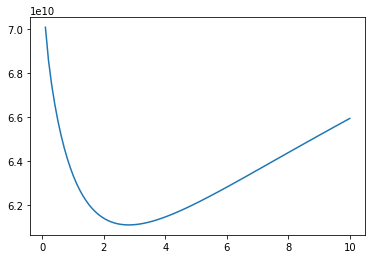

In [139]:
plt.plot(alphas, scores)

# Enet Model

In [141]:
from sklearn.linear_model import ElasticNetCV

In [142]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year', 
            'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']

X_train = claremont[features].to_numpy()
y_train = claremont['price'].to_numpy()

X_test = claremont_test[features].to_numpy()
y_test = claremont_test['price'].to_numpy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
alphas = np.logspace(-4, 0, 100)
ratios = np.linspace(0, 1, 20)

enet_model = ElasticNetCV(alphas = alphas, l1_ratio = ratios, cv=5)
enet_model.fit(X_train, y_train)

In [145]:
y_pred = enet_model.predict(X_test)

print('l1 ratio: {:.2f}'.format(enet_model.l1_ratio_))
print('Alpha: {:.2f}'.format(enet_model.alpha_))

print('RMSE: {:.2f}'.format(mse(y_test, y_pred, squared = False)))
print('R^2: {:.4f}'.format(r2_score(y_test, y_pred)))

l1 ratio: 0.68
Alpha: 0.25
RMSE: 115224.52
R^2: 0.8628
